# Plot adversarial AUROC, AP vs number of sampled transformations

In [1]:
%cd /home/ajay/coderep/representjs/representjs

/home/ajay/coderep/representjs/representjs


In [2]:
import csv
import glob
import os

import numpy as np
import torch
import sentencepiece as spm

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick

In [4]:
import seaborn as sns
sns.set_context("paper", font_scale=1.4)
# sns.set("paper")
sns.set_style("ticks")

In [5]:
!ls /home/ajay/coderep/representjs/data/codeclone

contrast_sim_adv1.pth
contrast_sim_adv4.pth
contrast_sim_lstm_onesidedadvupto32.pth
contrast_sim_onesidedadv0.pth
contrast_sim_onesidedadv16.pth
contrast_sim_onesidedadv4.pth
contrast_sim_onesidedadvupto0.pth
contrast_sim_onesidedadvupto16_nopad.pth
contrast_sim_onesidedadvupto16.pth
contrast_sim_onesidedadvupto4.pth
contrast_sim.pth
ed_sim_bs16.pth
ed_sim_bs1.pth
ed_sim_logs
ed_sim_onesidedadv4.pth
ed_sim_onesidedadvupto0.pth
ed_sim.pth
full_data.json
full_data.json.gz
hybrid_sim_adv1.pth
hybrid_sim_adv4.pth
hybrid_sim_onesidedadvupto0.pth
hybrid_sim_onesidedadvupto16_nopad.pth
hybrid_sim_onesidedadvupto32.pth
hybrid_sim_onesidedadvupto4.pth
hybrid_sim.pth
mlm_sim_2021593_bs16_shufF.pth
mlm_sim_2021593.pth
mlm_sim_adv0.pth
mlm_sim_adv1.pth
mlm_sim_adv32.pth
mlm_sim_adv4.pth
mlm_sim_debug.pth
mlm_sim_onesidedadv0.pth
mlm_sim_onesidedadv16.pth
mlm_sim_onesidedadv32.pth
mlm_sim_onesidedadv4.pth
mlm_sim_onesidedadvupto0.pth
mlm_sim_onesidedadvupto16_nopad.pth
mlm_sim_onesidedadvupto16.pth

In [88]:
random_name = 'No pretraining'

# extra_metrics = {
#     'Contrastive': {
# #         From ICLR rebuttals
# #         'eval/roc_auc_score/adv0': 0.7576,
# #         'eval/se_roc_auc/adv0': 0,  # TODO: Compute standard error
# #         'eval/ap_score/adv0': 0.7816,
# #         Rerun with adv code
#         'eval/roc_auc_score/adv0': 0.7547,
#         'eval/se_roc_auc/adv0': 0.0075,  # TODO: Compute standard error
#         'eval/ap_score/adv0': 0.7782,
#         'eval/accuracy/adv0': 0.6930,
# # 2021-02-02 16:48:15.804 | INFO     | __main__:_evaluate:311 - Saving labels, scores and metrics to data/codeclone/contrast_sim_onesidedadvupto0.pth
# # 2021-02-02 16:48:15.810 | INFO     | __main__:eval:788 - Evaluation eval/roc_auc_score/adv1 initial (0 epochs, 0 steps): 0.7547
# # 2021-02-02 16:48:15.810 | INFO     | __main__:eval:788 - Evaluation eval/se_roc_auc/adv1 initial (0 epochs, 0 steps): 0.0075
# # 2021-02-02 16:48:15.810 | INFO     | __main__:eval:788 - Evaluation eval/ap_score/adv1 initial (0 epochs, 0 steps): 0.7782
# # 2021-02-02 16:48:15.810 | INFO     | __main__:eval:788 - Evaluation eval/accuracy/adv1 initial (0 epochs, 0 steps): 0.6930
#     },
#     'Contrastive LSTM': {},
#     'Hybrid': {
# #         From ICLR rebuttals
# #         'eval/roc_auc_score/adv0': 0.7955,
# #         'eval/se_roc_auc/adv0': 0,
# #         'eval/ap_score/adv0': 0.8174,
# #         Rerun with adversarial code
#         'eval/roc_auc_score/adv0': 0.7926,
#         'eval/se_roc_auc/adv0': 0.0070,
#         'eval/ap_score/adv0': 0.8146,
# #         'eval/accuracy/adv0': 0.7312,
#     },
#     random_name: {
# #         From ICLR rebuttals
# #         'eval/roc_auc_score/adv0': 0.7428,
# #         'eval/se_roc_auc/adv0': 0,
# #         'eval/ap_score/adv0': 0.7640,
# #         Rerun with adversarial code, param set to 0
# #         'eval/roc_auc_score/adv0': 0.7019,
# #         'eval/se_roc_auc/adv0': 0.0081,
# #         'eval/ap_score/adv0': 0.7401,
# #         'eval/accuracy/adv0': 0.6528,
#         # Batch size 16
#         'eval/roc_auc_score/adv0': 0.7219,
#         'eval/se_roc_auc/adv0': 0.0079,
#         'eval/ap_score/adv0': 0.7524,
#         'eval/accuracy/adv0': 0.6637,
#     },
#     'RoBERTa': {
# #         From ICLR rebuttals
# #         'eval/roc_auc_score/adv0': 0.7479,
# #         'eval/se_roc_auc/adv0': 0,  # TODO: Compute standard error
# #         'eval/ap_score/adv0': 0.7637,
# #         'eval/accuracy/adv0': 0.6811,
# #         Rerun with adv code
#         'eval/roc_auc_score/adv0': 0.7611,
#         'eval/se_roc_auc/adv0': 0.0074,  # TODO: Compute standard error
#         'eval/ap_score/adv0': 0.7775,
#         'eval/accuracy/adv0': 0.6903,
# # 2021-02-02 16:48:01.762 | INFO     | __main__:_evaluate:311 - Saving labels, scores and metrics to data/codeclone/mlm_sim_onesidedadvupto0.pth
# # 2021-02-02 16:48:01.767 | INFO     | __main__:eval:788 - Evaluation eval/roc_auc_score/adv1 initial (0 epochs, 0 steps): 0.7611
# # 2021-02-02 16:48:01.767 | INFO     | __main__:eval:788 - Evaluation eval/se_roc_auc/adv1 initial (0 epochs, 0 steps): 0.0074
# # 2021-02-02 16:48:01.768 | INFO     | __main__:eval:788 - Evaluation eval/ap_score/adv1 initial (0 epochs, 0 steps): 0.7775
# # 2021-02-02 16:48:01.768 | INFO     | __main__:eval:788 - Evaluation eval/accuracy/adv1 initial (0 epochs, 0 steps): 0.6903
#     }
# }

# Natural code (non-adversarial, --adversarial_samples=0) results
# with cosine sim computed on mean-pooled representation across
# non-padding tokens.
extra_metrics = {
    'Contrastive': {
        'eval/roc_auc_score/adv0': 0.7681,
        'eval/se_roc_auc/adv0': 0.0073,
        'eval/ap_score/adv0': 0.7848,
    },
    'Hybrid': {
        'eval/roc_auc_score/adv0': 0.7939,
        'eval/se_roc_auc/adv0': 0.0070,
        'eval/ap_score/adv0': 0.8147,
    },
    random_name: {
        'eval/roc_auc_score/adv0': 0.7016,
        'eval/se_roc_auc/adv0': 0.0081,
        'eval/ap_score/adv0': 0.7396,
    },
    'RoBERTa': {
        'eval/roc_auc_score/adv0': 0.7154,
        'eval/se_roc_auc/adv0': 0.0079,
        'eval/ap_score/adv0': 0.7518,
    },
    'Contrastive MP': {},
    'RoBERTa MP': {},
    'Hybrid MP': {},
    random_name + ' MP': {},
}

data = {
    'Contrastive MP': [
        '/home/ajay/coderep/representjs/data/codeclone/contrast_sim_onesidedadvupto16_nopad_maxpool.pth',
        '/home/ajay/coderep/representjs/data/codeclone/contrast_sim_onesidedadvupto0_nopad_maxpool.pth',
    ],
    'RoBERTa MP': [
        '/home/ajay/coderep/representjs/data/codeclone/mlm_sim_onesidedadvupto16_nopad_maxpool.pth',
        '/home/ajay/coderep/representjs/data/codeclone/mlm_sim_onesidedadvupto0_nopad_maxpool.pth',
    ],
    'Contrastive': [
        '/home/ajay/coderep/representjs/data/codeclone/contrast_sim_onesidedadvupto16_nopad.pth',
    ],
    'RoBERTa': [
        '/home/ajay/coderep/representjs/data/codeclone/mlm_sim_onesidedadvupto16_nopad.pth',
    ],
    'Hybrid': [
        '/home/ajay/coderep/representjs/data/codeclone/hybrid_sim_onesidedadvupto16_nopad.pth',
    ],
    'Hybrid MP': [
        '/home/ajay/coderep/representjs/data/codeclone/hybrid_sim_onesidedadvupto16_nopad_maxpool.pth',
        '/home/ajay/coderep/representjs/data/codeclone/hybrid_sim_onesidedadvupto0_nopad_maxpool.pth',
    ],
    random_name: [
        '/home/ajay/coderep/representjs/data/codeclone/random_sim_onesidedadvupto16_nopad.pth',
    ],
    random_name + ' MP': [
        '/home/ajay/coderep/representjs/data/codeclone/random_sim_onesidedadvupto16_nopad_maxpool.pth',
        '/home/ajay/coderep/representjs/data/codeclone/random_sim_onesidedadvupto0_nopad_maxpool.pth',
    ],
}

zorder = {
    'Contrastive': 3,
    'Contrastive MP': 3,
    'Contrastive LSTM': 3,
    'Hybrid': 1,
    'Hybrid MP': 1,
    'RoBERTa': 2,
    'RoBERTa MP': 2,
    random_name: 1,
    random_name + ' MP': 1,
}

markers = {
    'Contrastive': 's',
    'Contrastive MP': '^',
    'Contrastive LSTM': 's',
    'Hybrid': '*',
    'Hybrid MP': '^',
    'RoBERTa': 'o',
    'RoBERTa MP': '*',
    random_name: '^',
    random_name + ' MP': 'o',
}

colors = {
    'Contrastive': 'b',
    'Contrastive MP': 'b',
    'Contrastive LSTM': 'steelblue',
    'Hybrid': 'purple',
    'Hybrid MP': 'purple',
    'RoBERTa': 'r',
    'RoBERTa MP': 'r',
    random_name: 'g',
    random_name + ' MP': 'g',
}

for key in data.keys():
    merged = None
    for path in data[key]:
        d = torch.load(path)
        del d['y_true']
        del d['y_scores']
        del d['num_examples']

        # hack to remap eval/.../adv1 keys to eval/.../adv0
        if 'onesidedadvupto0' in path:
            d['metrics'] = {k.replace('adv1', 'adv0'): v for k, v in d['metrics'].items()}

        if not merged:
            merged = d
        else:
            merged['metrics'].update(d['metrics'])
    data[key] = merged

In [89]:
data['RoBERTa'].keys()

dict_keys(['metrics'])

In [152]:
# dict_keys(['eval/roc_auc_score/adv1', 'eval/se_roc_auc/adv1', 'eval/ap_score/adv1', 'eval/accuracy/adv1', 'eval/num_examples/adv1', 'eval/num_positive/adv1', 'eval/num_negative/adv1', 'eval/roc_auc_score/adv2', 'eval/se_roc_auc/adv2', 'eval/ap_score/adv2', 'eval/accuracy/adv2', 'eval/num_examples/adv2', 'eval/num_positive/adv2', 'eval/num_negative/adv2', 'eval/roc_auc_score/adv3', 'eval/se_roc_auc/adv3', 'eval/ap_score/adv3', 'eval/accuracy/adv3', 'eval/num_examples/adv3', 'eval/num_positive/adv3', 'eval/num_negative/adv3', 'eval/roc_auc_score/adv4', 'eval/se_roc_auc/adv4', 'eval/ap_score/adv4', 'eval/accuracy/adv4', 'eval/num_examples/adv4', 'eval/num_positive/adv4', 'eval/num_negative/adv4'])

def plot_robustness_data(data, *, label_mapping=None, xlabel, ylabel, ymin=.1, ymax=None, figsize=(5, 2.5), random_line=None, metric_prefix='eval/roc_auc_score/adv', se_prefix='eval/se_roc_auc/adv', savepath=None):
    fig = plt.figure(figsize=figsize)
    
    maxx = 0
    
    # Shade random guessing area
    if random_line is not None:
        xlim = [-1, 20+1]
        plt.hlines(random_line, *xlim, linestyle='dashed', color='k', zorder=1)  #, label='Random guess'
        plt.fill_between(xlim, 0, random_line, color='r', alpha=0.1)

#     contrast_y = None
#     mlm_y = None
        
    for series_name, series in data.items():
        metric_by_samples = {}
        se_by_samples = {}
        
        series['metrics'].update(extra_metrics[series_name])
        
        for metric_key, value in series['metrics'].items():
            if metric_key.startswith(metric_prefix):
                adversarial_samples = int(metric_key[len(metric_prefix):])
                metric_by_samples[adversarial_samples] = value

            if se_prefix and metric_key.startswith(se_prefix):
                adversarial_samples = int(metric_key[len(se_prefix):])
                se_by_samples[adversarial_samples] = value

        #print(series_name, metric_by_samples, se_by_samples)
        mean_metric = np.mean([metric_by_samples[i] for i in range(1,16)])
        if se_by_samples:
            print(series_name + ',',
                  f'{metric_by_samples[0]*100:.2f}'+r'\tiny{$\pm$'+f'{se_by_samples[0]*100:.2f}'+'},',
                  f'{metric_by_samples[4]*100:.2f}'+r'\tiny{$\pm$'+f'{se_by_samples[4]*100:.2f}'+'},',
                  f'{metric_by_samples[16]*100:.2f}'+r'\tiny{$\pm$'+f'{se_by_samples[16]*100:.2f}'+'},',
                  f'{mean_metric*100:.2f}')
        else:
            print(series_name+',', f'{metric_by_samples[0]*100:.2f}, {metric_by_samples[4]*100:.2f}, {metric_by_samples[16]*100:.2f}, {mean_metric*100:.2f}')

        x, y = zip(*sorted(metric_by_samples.items()))
        if se_prefix:
            x_se, se = zip(*sorted(se_by_samples.items()))
            assert x == x_se
            y1_se = np.array(y) - np.array(se)
            y2_se = np.array(y) + np.array(se)
            plt.fill_between(x, y1_se, y2_se, color=colors[series_name], alpha=0.2)
        if label_mapping:
            series_name = label_mapping[series_name]
        plt.plot(x, y, label=series_name, marker=markers[series_name], color=colors[series_name], linewidth=2, zorder=zorder[series_name])
        
#         if series_name == 'Contrastive':
#             contrast_y = np.array(y)
#         elif series_name == 'RoBERTa':
#             mlm_y = np.array(y)
        
        maxx = max(maxx, max(x))

    maxx = min(16, maxx)
    
#     print(contrast_y - mlm_y)
        
    ax = fig.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.xlim([-.15, maxx+.15])
    plt.ylim([ymin, ymax])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    plt.legend(frameon=False)
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath)
    plt.show()

Contrastive MP, 75.73\tiny{$\pm$0.75}, 64.97\tiny{$\pm$0.24}, 58.32\tiny{$\pm$0.88}, 62.72
RoBERTa MP, 74.04\tiny{$\pm$0.77}, 25.83\tiny{$\pm$0.21}, 4.51\tiny{$\pm$0.33}, 18.78
Contrastive, 76.81\tiny{$\pm$0.73}, 58.87\tiny{$\pm$0.24}, 47.63\tiny{$\pm$0.90}, 54.84
RoBERTa, 71.54\tiny{$\pm$0.79}, 22.91\tiny{$\pm$0.20}, 2.82\tiny{$\pm$0.26}, 16.44
Hybrid, 79.39\tiny{$\pm$0.70}, 37.81\tiny{$\pm$0.24}, 10.09\tiny{$\pm$0.50}, 27.52
Hybrid MP, 78.20\tiny{$\pm$0.71}, 31.78\tiny{$\pm$0.23}, 3.79\tiny{$\pm$0.31}, 21.53
No pretraining, 70.16\tiny{$\pm$0.81}, 18.92\tiny{$\pm$0.19}, 1.35\tiny{$\pm$0.18}, 13.71
No pretraining MP, 72.31\tiny{$\pm$0.79}, 22.72\tiny{$\pm$0.20}, 3.09\tiny{$\pm$0.28}, 16.53


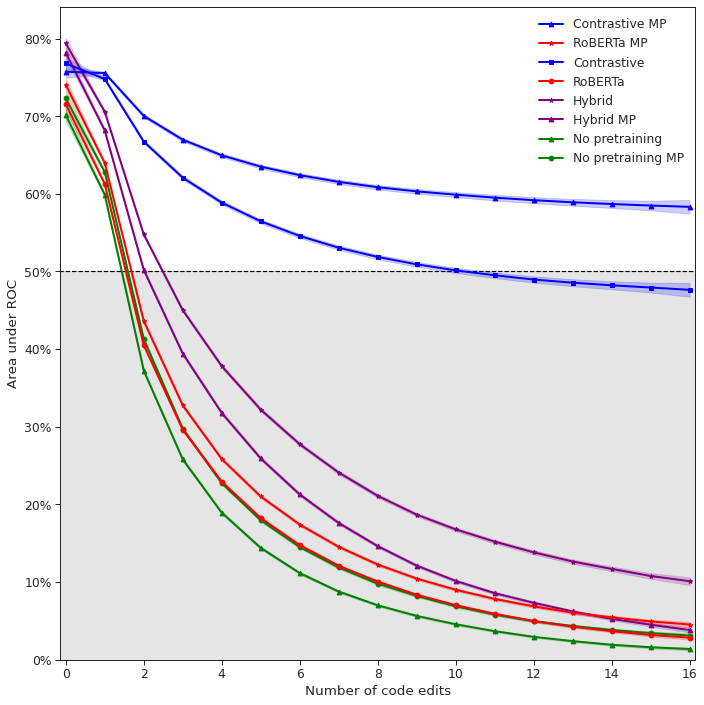

In [135]:
plot_robustness_data(
    data,
    xlabel='Number of code edits',
    ylabel='Area under ROC',
    random_line=0.5,
    ymin=0,
    figsize=(10, 10),
    metric_prefix='eval/roc_auc_score/adv',
    se_prefix='eval/se_roc_auc/adv',
    savepath='/home/ajay/coderep/representjs/data/codeclone/robust_auroc_mp_big.pdf')

Contrastive MP, 75.73\tiny{$\pm$0.75}, 64.97\tiny{$\pm$0.24}, 58.32\tiny{$\pm$0.88}, 62.72
RoBERTa MP, 74.04\tiny{$\pm$0.77}, 25.83\tiny{$\pm$0.21}, 4.51\tiny{$\pm$0.33}, 18.78


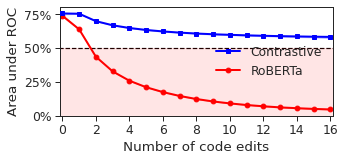

In [153]:
plot_robustness_data(
    {'Contrastive MP': data['Contrastive MP'], 'RoBERTa MP': data['RoBERTa MP']},
    label_mapping={'Contrastive MP': 'Contrastive', 'RoBERTa MP': 'RoBERTa'},
    xlabel='Number of code edits',
    ylabel='Area under ROC',
    random_line=0.5,
    ymin=0,
    figsize=(5, 2.5),
    metric_prefix='eval/roc_auc_score/adv',
    se_prefix='eval/se_roc_auc/adv',
    savepath='/home/ajay/coderep/representjs/data/codeclone/robust_auroc_mp.pdf')

Contrastive MP, 78.02, 66.23, 59.66, 64.06
RoBERTa MP, 77.65, 39.46, 31.17, 37.57
Contrastive, 78.48, 60.08, 48.80, 55.99
RoBERTa, 75.18, 37.17, 30.99, 36.36
Hybrid, 81.47, 51.42, 32.52, 44.19
Hybrid MP, 79.99, 47.70, 31.28, 41.64
No pretraining, 73.96, 35.38, 30.75, 35.37
No pretraining MP, 75.82, 37.73, 30.95, 36.66


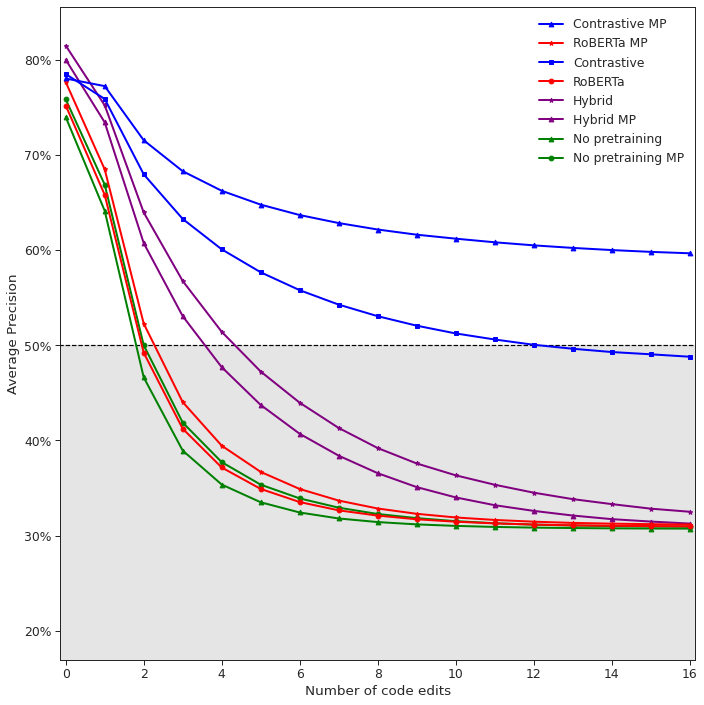

In [138]:
plot_robustness_data(
    data,
    xlabel='Number of code edits',
    ylabel='Average Precision',
    random_line=0.5,  # as the dataset is balanced
    ymin=0.17,
    figsize=(10, 10),
    metric_prefix='eval/ap_score/adv',
    se_prefix='',
    savepath='/home/ajay/coderep/representjs/data/codeclone/robust_ap_mp_big.pdf')

Contrastive MP, 78.02, 66.23, 59.66, 64.06
RoBERTa MP, 77.65, 39.46, 31.17, 37.57


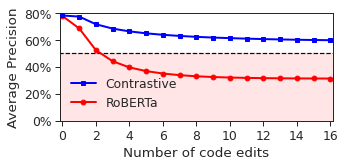

In [157]:
plot_robustness_data(
    {'Contrastive MP': data['Contrastive MP'], 'RoBERTa MP': data['RoBERTa MP']},
    label_mapping={'Contrastive MP': 'Contrastive', 'RoBERTa MP': 'RoBERTa'},
    xlabel='Number of code edits',
    ylabel='Average Precision',
    random_line=0.5,  # as the dataset is balanced
    ymin=0,
    ymax=.8,
    figsize=(5, 2.5),
    metric_prefix='eval/ap_score/adv',
    se_prefix='',
    savepath='/home/ajay/coderep/representjs/data/codeclone/robust_ap_mp.pdf')